## <b>Time Series</b>: Analysis, Forecasting and Simulation.

### What is Time Series?
A series of values of a quantity obtained at successive times, often with equal intervals between them. eg, stock values, weather data, sales, arrivals.

### Why study Time series?

The "time component" in most time series is elusive to many of the popular machine learning algorithms. Given the obvious need to model the temporal relationships and complexity at hand, time series analysis demands employment of investigative statistical approaches.

### What is Time series analysis?

The goal is to understand the "how" and the "why", to gain insights into the form of the data, and to decompose the data into it's constituent components. In contrast to other ML tasks, the focus isn't so much on optimising the decision output, as it is to "analyse" the data.

### Important points to consider before analysis:

1. What is the time horizon of predictions? short, medium, or long.
2. Static or Dynamic forecasts?
3. What temporal frequency? Data can be resampled based on frequency needs.
4. How to deal with outliers and missing data?



## DATASET:
<b>Historical Hourly Weather Data 2012-2017</b>, collected from OpenWeatherMap.

Weather data has interesting time patterns and is easy to understand. Also there are potentially
many interesting correlations between other everyday life data and the weather.
### Link:
https://www.kaggle.com/selfishgene/historical-hourly-weather-data/downloads/historical-hourly-weather-data.zip/2

## Setting the environment. 

In [220]:
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn
import statsmodels
import os, warnings
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from pydlm import dlm, trend, seasonality, dynamic, autoReg

In [70]:
print(os.listdir("historical-hourly-weather-data/"))

['weather_description.csv', 'humidity.csv', 'wind_direction.csv', 'temperature.csv', 'pressure.csv', 'city_attributes.csv', 'wind_speed.csv']


In [71]:
#import data
humidity = pd.read_csv('historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# Displaying basic data distribution stats.
humidity.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,...,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000,45252.000000
mean,81.942500,74.671462,75.882370,77.091731,62.686290,67.750398,31.625254,37.139972,44.926147,52.848449,...,67.912357,66.363851,71.903297,77.298197,70.353885,66.613299,53.884071,80.061898,78.889574,68.560594
std,14.480778,19.058088,18.701274,18.181885,21.878649,19.499684,20.083504,21.652629,23.383404,23.974213,...,18.841050,19.742648,16.915800,18.763624,21.224700,16.470248,27.769451,22.966559,23.602295,19.156980
min,12.000000,10.000000,6.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,10.000000,10.000000,7.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,73.000000,63.000000,67.000000,66.000000,48.000000,56.000000,16.000000,21.000000,26.000000,33.000000,...,54.000000,51.000000,60.000000,64.000000,54.000000,58.000000,31.000000,64.000000,61.000000,56.000000
50%,86.000000,80.000000,80.000000,81.000000,66.000000,71.000000,27.000000,32.000000,41.000000,52.000000,...,68.000000,67.000000,74.000000,81.000000,76.000000,68.000000,48.000000,91.000000,89.000000,70.000000
75%,93.000000,90.000000,89.000000,93.000000,81.000000,82.000000,43.000000,49.000000,63.000000,73.000000,...,83.000000,82.000000,86.000000,93.000000,88.000000,78.000000,77.000000,100.000000,100.000000,83.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


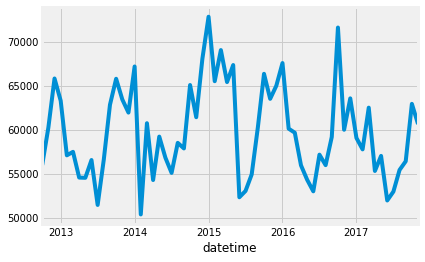

In [256]:
x=humidity.Vancouver.resample('M').sum()
x.plot()

## Data preprocessing

1. Missing values can either be filled with 0s or with some interpolation.

2. 'ffill' parameter in fillna uses the last observed value to fill the gaps. 'bfill' uses the next value.


In [72]:
# iloc allows one to select rows in the dataframe.
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


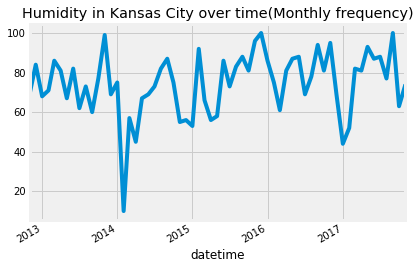

In [73]:
# Visualisation of the given series
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

In [74]:
# Use this function to convert to datetime if indices are not datetime.
pd.to_datetime?

## Shifts and Lags
The index can be shifted by a desired number of periods; useful when comparing a time series to a past of itself.


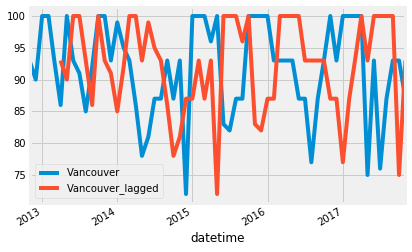

In [75]:
# Adding a shift of 5.
# .asfreq() fn allows to control the frequency of the series, more on it in the next line.

humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(5).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## Resampling

1. <b>Upsampling</b>: Low frequency to High Frequency (eg. Monthly to Weekly). Involves interpolation/missing value filling

2. <b> Downsampling</b>: High frequency to Low Frequency (eg. Weekly to Monthly). Involves aggregation of data.

The pandas function `asfreq()` returns the original data conformed to a new index with the specified frequency. `resample()` is more appropriate if an operation, such as summarization, is necessary to represent the data at the new frequency.

In [76]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-26,1021.0,1010.0,1013.0,1009.0,1015.0,1017.0,1019.0,1016.0,1024.0,1023.0,...,1008.0,1020.0,1003.0,1004.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-27,1021.0,1007.0,1013.0,1004.0,1016.0,1016.0,1015.0,1014.0,1024.0,1020.0,...,1017.0,1020.0,1012.0,1012.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-28,1021.0,1023.0,1013.0,1021.0,1015.0,1015.0,1012.0,1007.0,1013.0,1006.0,...,1023.0,1020.0,1025.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29,1021.0,1020.0,1013.0,1016.0,1013.0,1015.0,1018.0,1015.0,1024.0,1027.0,...,1026.0,1020.0,1014.0,1026.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [103]:
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-02,807.0,1024.0,1011.0,1035.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-03,1008.0,1019.0,1012.0,1022.0,1009.0,1009.0,1014.0,1010.0,1022.0,1024.0,...,1015.0,1014.0,1007.0,1013.0,986.0,1014.0,1013.0,1013.0,1013.0,992.0
2012-10-04,1012.0,1020.0,1008.0,1024.0,1009.0,1010.0,1010.0,1009.0,1017.0,1014.0,...,1014.0,1015.0,1015.0,1015.0,987.0,1015.0,1013.0,1013.0,1013.0,990.0
2012-10-05,1032.0,1021.0,1012.0,1026.0,1014.0,1015.0,1011.0,1012.0,1017.0,1020.0,...,1019.0,1019.0,1019.0,1021.0,985.0,1014.0,1014.0,1013.0,1013.0,991.0
2012-10-06,1015.0,1028.0,1019.0,1025.0,1017.0,1018.0,1012.0,1014.0,1020.0,1024.0,...,1018.0,1017.0,1016.0,1020.0,984.0,1013.0,1011.0,1013.0,1013.0,990.0


In [79]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

In [35]:
# Downsampling from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,954.060000,1022.400000,1011.140000,1031.640000,1011.380000,1011.780000,1016.020000,1011.920000,1022.280000,1023.420000,...,1014.180000,1013.680000,946.660000,1013.620000,985.240000,1013.120000,1012.120000,1013.000000,1013.000000,990.620000
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [80]:
# Shape after resampling(downsampling)
pressure.shape

(45252, 36)

In [81]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-02,807.0,1024.0,1011.0,1035.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-03,1008.0,1019.0,1012.0,1022.0,1009.0,1009.0,1014.0,1010.0,1022.0,1024.0,...,1015.0,1014.0,1007.0,1013.0,986.0,1014.0,1013.0,1013.0,1013.0,992.0
2012-10-04,1012.0,1020.0,1008.0,1024.0,1009.0,1010.0,1010.0,1009.0,1017.0,1014.0,...,1014.0,1015.0,1015.0,1015.0,987.0,1015.0,1013.0,1013.0,1013.0,990.0
2012-10-05,1032.0,1021.0,1012.0,1026.0,1014.0,1015.0,1011.0,1012.0,1017.0,1020.0,...,1019.0,1019.0,1019.0,1021.0,985.0,1014.0,1014.0,1013.0,1013.0,991.0


## Comparing multiple series

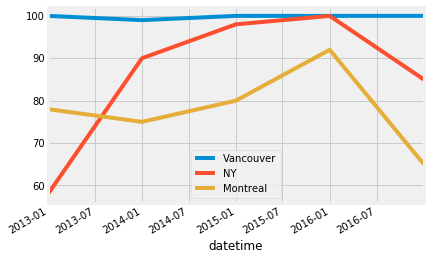

In [226]:
humidity['Vancouver'].asfreq('Y').plot()
humidity['New York'].asfreq('Y').plot()
humidity['Montreal'].asfreq('Y').plot()
plt.legend(['Vancouver','NY', 'Montreal'])
plt.show()

## Window Functions:
1. <b>Rolling Window</b>: With a fixed size sliding window.
2. <b>Expanding Window</b>: Contains all prior values

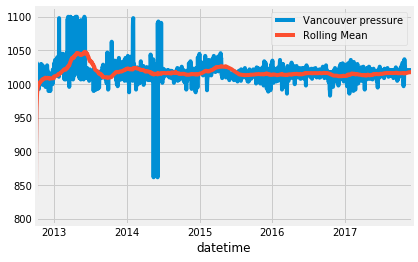

In [228]:
# Rolling window functions
rolling_vancouver = pressure.Vancouver.rolling('90D').mean()
pressure.Vancouver.plot()
rolling_vancouver.plot()
plt.legend(['Vancouver pressure','Rolling Mean'])
# Plotting a rolling mean of 90 day window
plt.show()

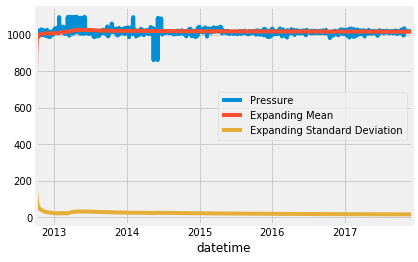

In [84]:
# Expanding window functions
pressure_mean = pressure.Vancouver.expanding().mean()
pressure_std = pressure.Vancouver.expanding().std()
pressure.Vancouver.plot()
pressure_mean.plot()
pressure_std.plot()
plt.legend(['Pressure','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## Histogram and Density Plot

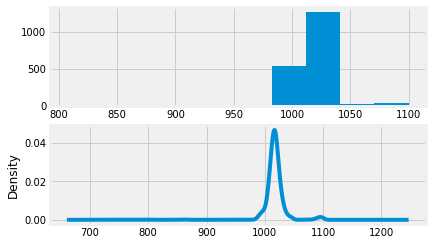

In [85]:
# Histogram and Density plot
plt.figure(1)
plt.subplot(211)
pressure.Vancouver.hist()
plt.subplot(212)
pressure.Vancouver.plot(kind='kde')
plt.show()

## Box plot

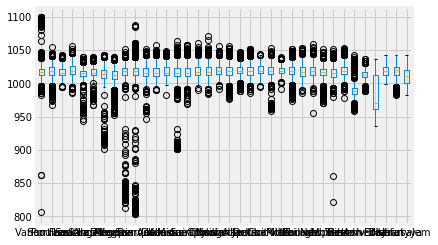

In [93]:
## Box plot. The yellow line shows median and the blue box the spread
pressure.boxplot()

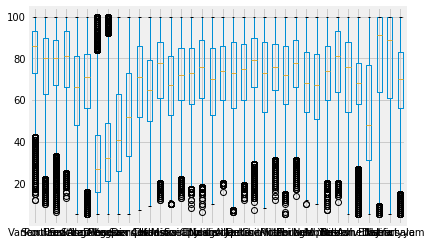

In [94]:
humidity.boxplot()

## Autocorrelation and Partial Autocoreelation

1. <b>Autocorrelation</b> measures how a series is correlated with itself at different lags.
2. <b>Partial autocorrelation</b> is regression of the series against its past lags.



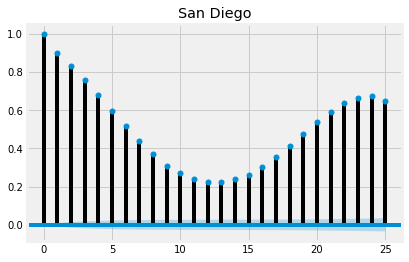

In [95]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()
##As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

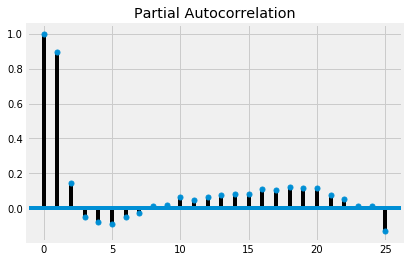

In [96]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()
##Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

## Time Series Decomposition and Random Walk
Four important constituents:
1. Level: The baseline value for the series if it were a straight line.
2. Trend. The increasing or decreasing behaviour in a time series. or changing mean.
3. Seasonality: The optional repeating patterns or cycles of behaviour over time.
4. Noise: The optional variability in the observations that cannot be explained in the model.

Generally, a time series y can be understood as linear combination of these constituents.
y= level + noise + (trend) + (seasonality) + (additional dynamic components)
(): optional constituents.

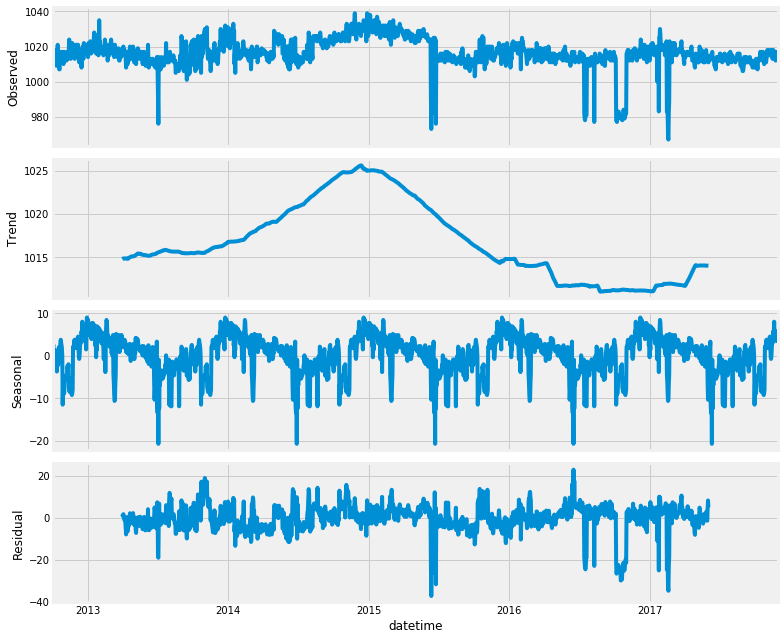

In [104]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_humidity = sm.tsa.seasonal_decompose(pressure['San Diego'],freq=360) # The frequncy is annual
figure = decomposed_humidity.plot()
plt.show()

###  White noise has constant mean, constant variance and zero autocorrelation at all lags.

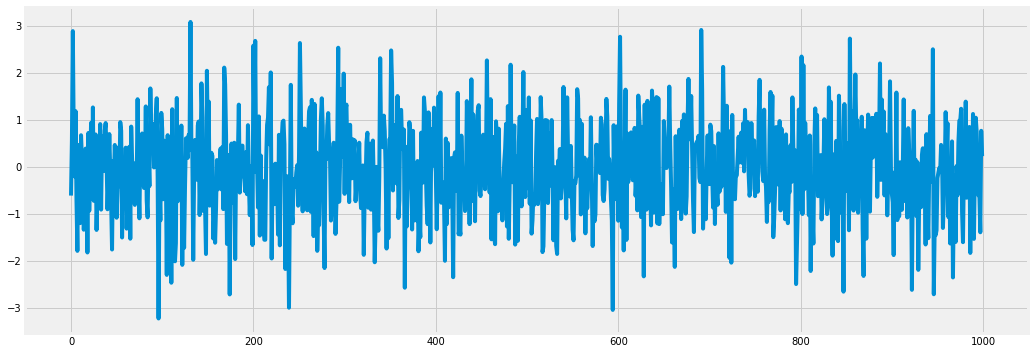

In [257]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

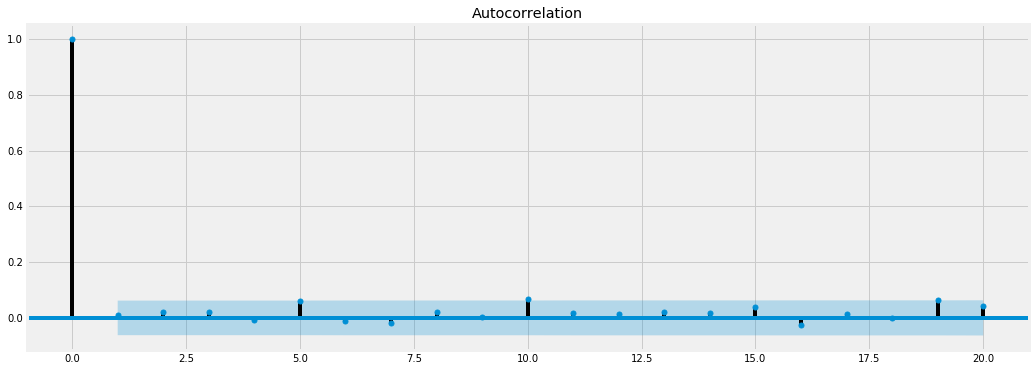

In [106]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

Notice how all lags are statistically insignificant as they lie within the confidence interval (shaded region).

### Random Walk

A random walk is a mathematical object, known as stochastic or random process that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

$P_t = P_{t-1} + \epsilon_t$

### Regression test for random walk

$X_t = \alpha + \beta X_{(t-1)} + \epsilon_t$ equivalent to $X_t - X_{(t-1)} = \alpha + \beta X_{(t-1)}+ \epsilon_t$

$H_0 : \beta =1 $ : Random Walk (Note: Random walks are non stationary, but vice versa isn't always true.)
<br />$H_1 : \beta < 1 $ : Not a Random Walk


### Dickey Fuller Test

$H_0 : \beta =0 $ : Random Walk
<br />$H_1 : \beta < 0 $ : Not a Random Walk

In [109]:
## Augmented Dickey Fuller test example 
adf = adfuller(pressure["Vancouver"])
print("p-value: {}".format(float(adf[1])))

p-value: 7.425293204014902e-05


Pressure in Vancouver has p-value of 0.00007425, which is < 0.05; null hypothesis is rejected and this is not a random walk

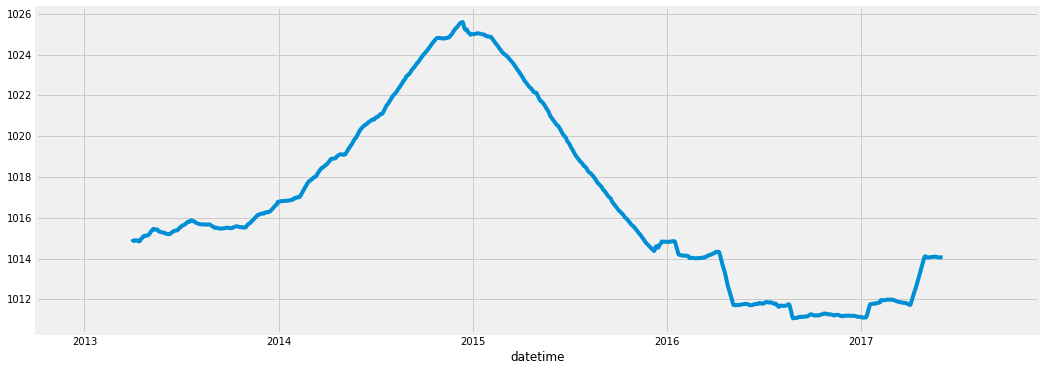

In [110]:
decomposed_humidity.trend.plot()

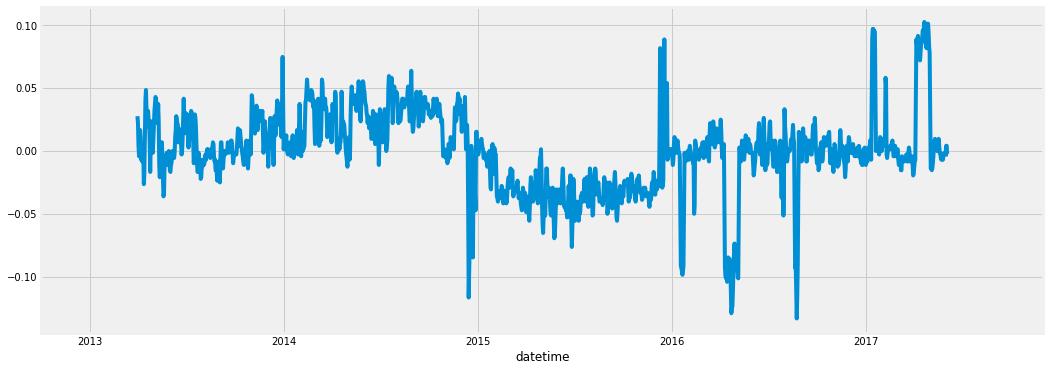

In [112]:
decomposed_humidity.trend.diff().plot()

## Modelling

1. Autoregressive (AR) model
2. Moving Averages (MA) model
3. ARMA models
4. Autoregressive Integrated Moving Averages (ARIMA) model
5. Vector Autoregression (VAR) model
6. State Space Models

### Establishing baseline

Persistence model: Uses value at $X_{t-n}$ to predict $X_t$.

The function below calculates a good value for n applies persistence on it.

Optimal persistence value: 42


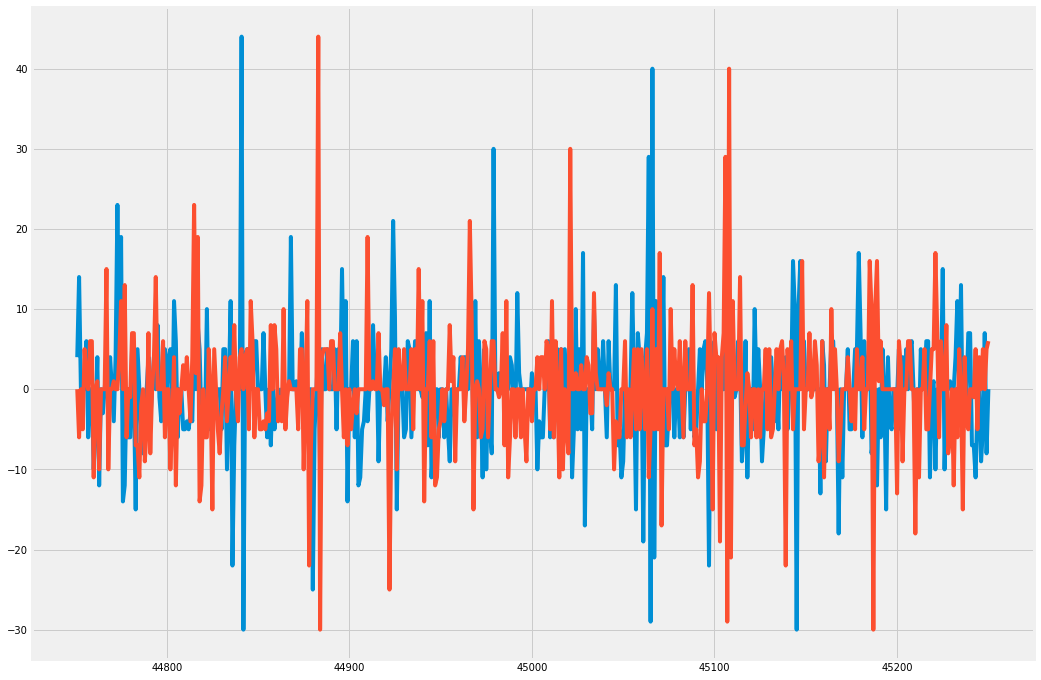

RMSE: 9.783250993407048


In [141]:
#Optimised Persistence: can use obs(t-n) to predict obs(t)
def optimised_persistence(series, persistence):
    x= series.values
    train, test= x[0:-persistence], x[-persistence:]
    persistence_values= range(1,(persistence+1))
    scores=[]
    for p in persistence_values:
        # walk-forward validation
        history = [x for x in train]
        predictions = list()
        for i in range(len(test)):
            # make prediction
            y_hat = history[-p]
            predictions.append(y_hat)
            # observation
            history.append(test[i])
        # report performance
        error = np.sqrt(mean_squared_error(test, predictions))
        scores.append(error)
       
        #print('p=%d RMSE:%.3f' % (p, rmse))
    #print(scores)    
    sel_p=scores.index(min(scores))+1
    print("Optimal persistence value:", sel_p)
    pred=[]
    for i in range(len(test)):
        y_hat= history[-sel_p]
        pred.append(y_hat)
        history.append(test[i])
    rmse = np.sqrt(mean_squared_error(test, pred))

    #plot scores over persistence values
    #plt.plot(persistence_values, scores)
    #plt.show()
    plt.plot([None for i in train] + [x for x in test], label='Expected')
    plt.plot([None for i in train] + [x for x in pred], label= 'Forecasted')
    plt.show()
    print("RMSE:", rmse)

optimised_persistence(humidity['Montreal'].diff().iloc[1:],500)

### Autoregressive (AR) models

$X_t = \mu + \phi X_{t-1} + \epsilon_t$

Current timestep is a function of a previous timestep.
<br />If $\phi= 1$, it is a random walk, $\phi= 0$, it is white noise and $-1<\phi< 1$, it is stationary

AR(2) model:
<br /> $X_t= \mu + \phi X_{t-1} +  \phi X_{t-2}+\epsilon_t$, and so on..

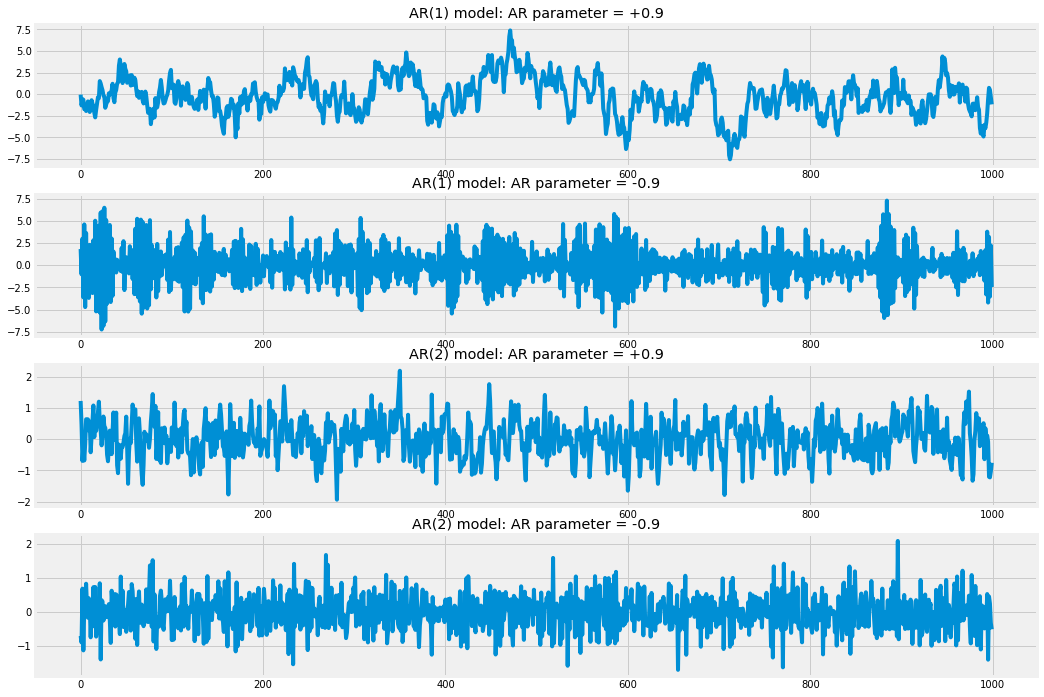

In [113]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [116]:
### Forecasting a simulated model
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1388.008
Method:                       css-mle   S.D. of innovations              0.969
Date:                Tue, 21 May 2019   AIC                           2782.015
Time:                        14:11:06   BIC                           2796.739
Sample:                             0   HQIC                          2787.611
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2367      0.285     -0.832      0.406      -0.795       0.321
ar.L1.y        0.8933      0.014     63.332      0.000       0.866       0.921
                                    Roots           

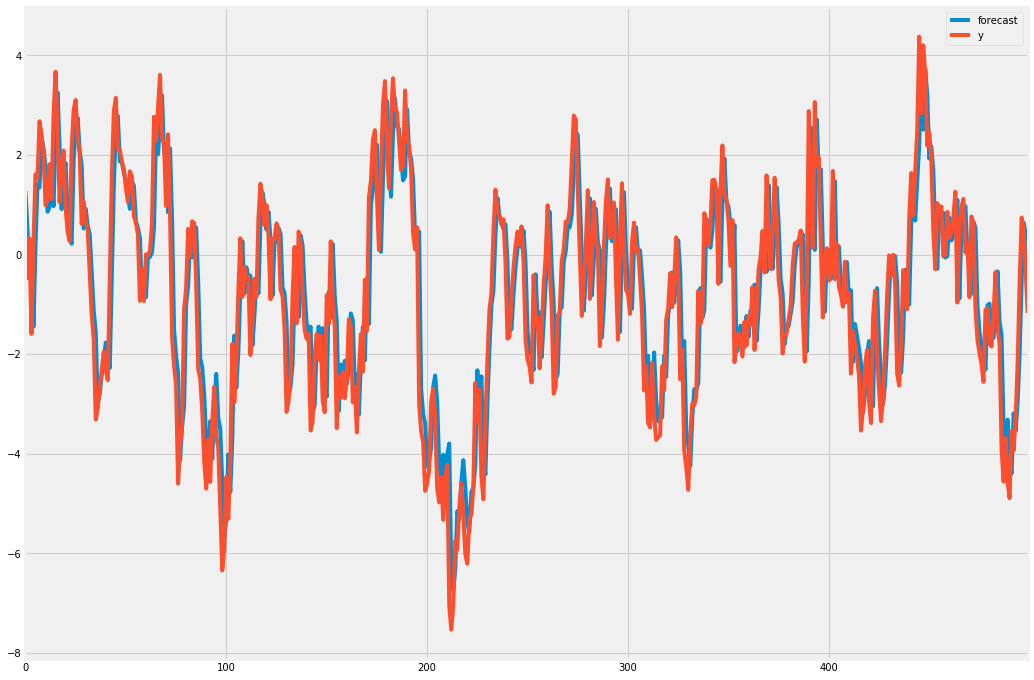

In [147]:
# Predicting simulated AR(1) model 
result.plot_predict(start=500, end=999)
plt.show()

In [128]:
rmse = math.sqrt(mean_squared_error(sim1[500:1010], result.predict(start=500,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0025403074335346.


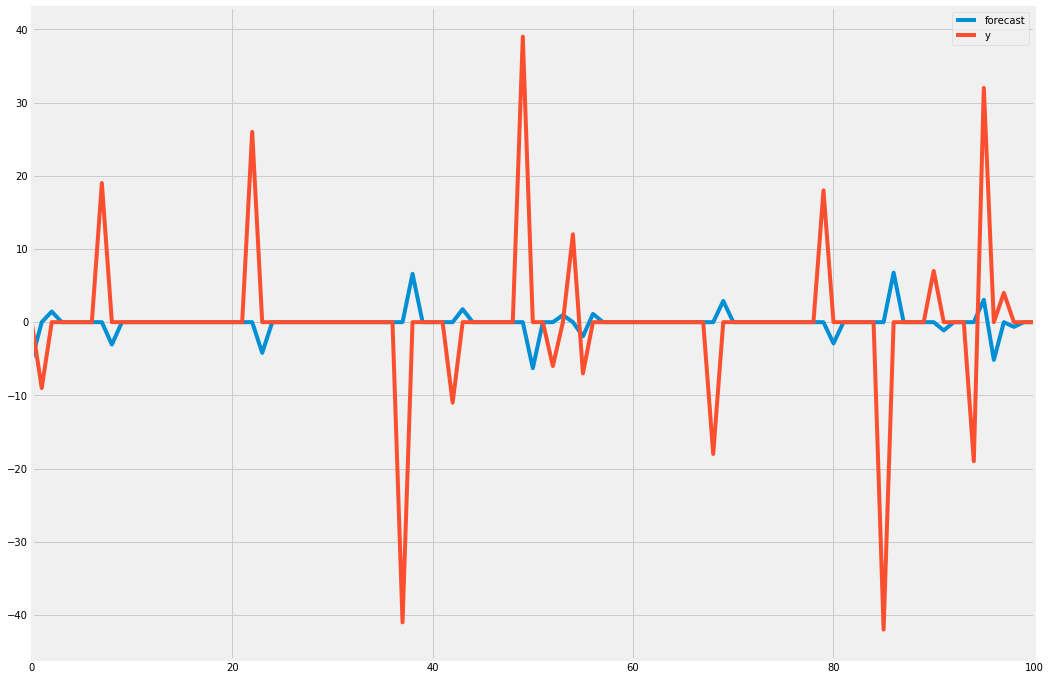

In [134]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()


In [136]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.176577329845937.


### Moving Average (MA) models

This model specifies that the output variable depends linearly on the current and the various past values of a stochastic term(noise)
<br >  MA(1) model
<br > $X_t = \mu + \epsilon_t 1 +\theta \epsilon_{t-1}$

### Simulating MA(1) model


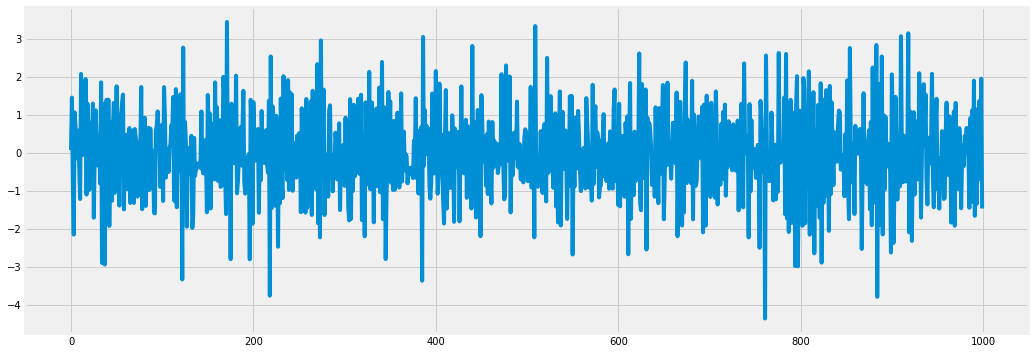

In [148]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

### Forecasting the simulated MA model

In [150]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.590
Method:                       css-mle   S.D. of innovations              1.005
Date:                Tue, 21 May 2019   AIC                           2853.179
Time:                        16:52:24   BIC                           2867.902
Sample:                             0   HQIC                          2858.775
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0092      0.015     -0.592      0.554      -0.039       0.021
ma.L1.y       -0.5137      0.027    -18.740      0.000      -0.567      -0.460
                                    Roots           

### Prediction using MA models



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Tue, 21 May 2019   AIC                         307043.965
Time:                        16:53:39   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

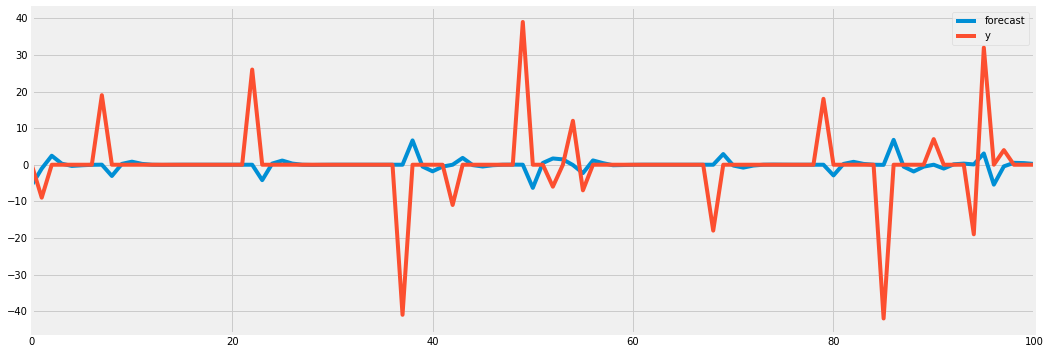

In [151]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [152]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.34512804398336.


### ARMA models combine AR and MA models
<br >$X_t = \mu + \phi X_{t-1} + \epsilon_t + \theta \epsilon_{t-1}$

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(2, 3)   Log Likelihood             -151457.397
Method:                       css-mle   S.D. of innovations              6.876
Date:                Tue, 21 May 2019   AIC                         302928.794
Time:                        18:03:15   BIC                         302989.834
Sample:                             0   HQIC                        302948.004
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.023      0.022      0.983      -0.045       0.046
ar.L1.y        1.9315      0.000   1.44e+04      0.000       1.931       1.932
ar.L2.y       -0.9996      0.000  -7389.117      0.0

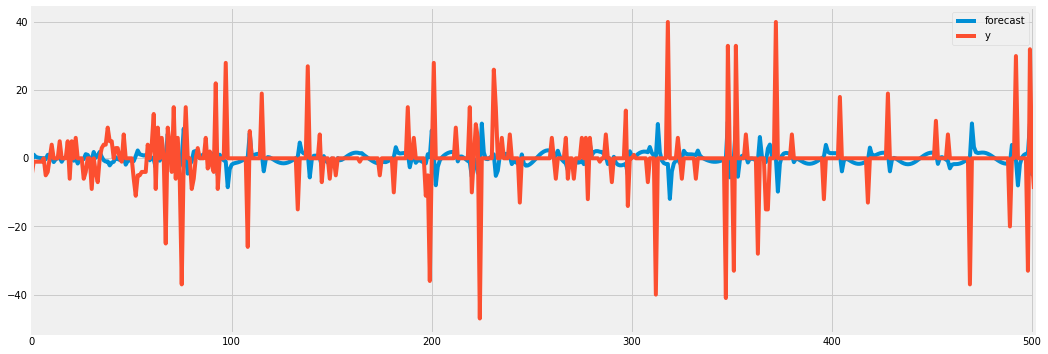

In [169]:
# Forecasting and predicting using 
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(2,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=500, end=1001)
plt.show()

In [168]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[500:1001].values, result.predict(start=600,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 8.326221821467236.


### ARIMA models: Autoregressive + Integrated + Moving Average

ARIMA is similar to ARMA except there is a differencing step involved that can be used to eliminate any apparent non-stationarity.

ARIMA has three parameters: p(AR), d(I), and q(MA)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                45250
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -160148.422
Method:                       css-mle   S.D. of innovations              8.333
Date:                Tue, 21 May 2019   AIC                         320304.844
Time:                        18:10:39   BIC                         320339.724
Sample:                             1   HQIC                        320315.821
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.68e-05      0.018      0.002      0.999      -0.035       0.035
ar.L1.D.y     -0.8087      0.004   -186.408      0.000      -0.817      -0.800
ar.L2.D.y     -0.3851      0.004    -88.775      0.0

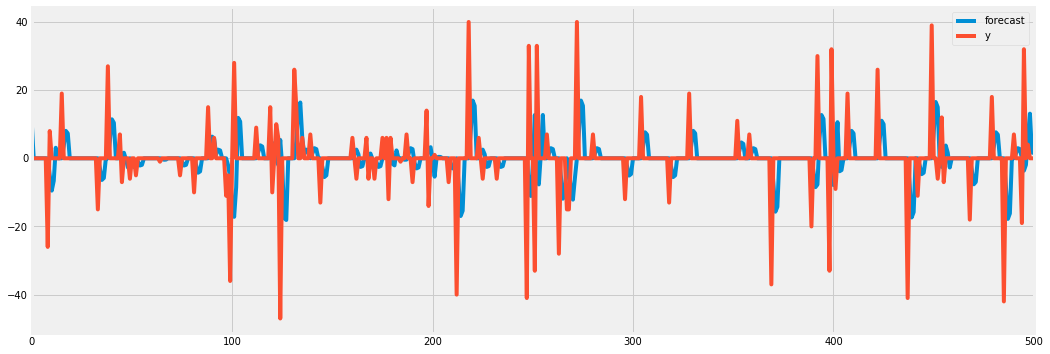

In [174]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(humidity["Montreal"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=600, end=1100)
print(result.params)
#print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
plt.show()

In [179]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[600:1101].values, result.predict(start=600,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 16.39386283964293.


## Grid search on p,d,q

In [199]:
def evaluate_arima(serie,order):
    serie=pd.Series(serie)
    model = ARIMA(serie.diff().iloc[1:], order)
    result = model.fit()
    rmse = math.sqrt(mean_squared_error(serie.diff().iloc[600:1101], result.predict(start=600,end=1100)))
    #print("The root mean squared error is {}.".format(rmse))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
#arima(humidity['Montreal'],(2,1,0))
p_values = range(0,1)
d_values = range(0, 3)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(humidity['Montreal'], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.403
ARIMA(0, 0, 1) RMSE=9.661
ARIMA(0, 1, 0) RMSE=8.403
ARIMA(0, 1, 1) RMSE=16.801
ARIMA(0, 2, 0) RMSE=8.403
ARIMA(0, 2, 1) RMSE=19.682
Best ARIMA(0, 0, 0) RMSE=8.403


### Reviewing Residual Errors

Ideally, the distribution of residual errors should be a Gaussian with a zero mean.

We can check this by plotting the residuals with a histogram and density plots.

The example below calculates the residual errors for predictions on the test set and creates these density plots.



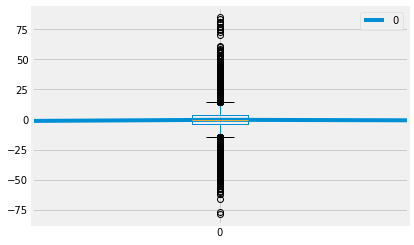

In [217]:
x=pd.DataFrame(result.resid)
x.plot()
x.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ce6eb390>]],
      dtype=object)

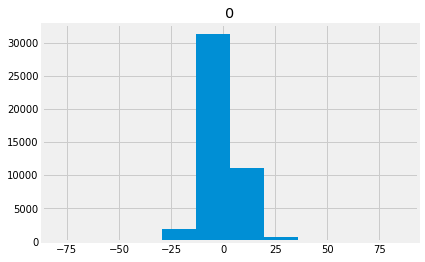

In [218]:
x.hist()

### Vector AutoRegression (VAR) models

VAR is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalise the univariate autoregression model (AR) by allowing for more than one evolving variable.

A two series VAR(1) model:

$y_{1,t} = c1 + \phi_{11,1} y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \epsilon_{1,t}$
<br >$y_{2,t} = c2 + \phi_{21,1} y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \epsilon_{2,t}$,

where,
1. $\epsilon_{1,t}$ and $\epsilon_{2,t}$ are white noise processes that may be contemporaneously correlated.
2. $\phi_{ii,l}$ captures the effect of $l_th$ lag of the series $y_i$ on itself.
3. $\phi_{ij,l}$ captures the effect of $l_th$ lag of the series $y_j$ on $y_i$

                               Statespace Model Results                              
Dep. Variable:     ['Vancouver', 'Montreal']   No. Observations:                45251
Model:                            VARMA(2,1)   Log Likelihood             -309620.951
                                 + intercept   AIC                         619275.903
Date:                       Tue, 21 May 2019   BIC                         619424.142
Time:                               23:47:20   HQIC                        619322.554
Sample:                           10-01-2012                                         
                                - 11-30-2017                                         
Covariance Type:                         opg                                         
Ljung-Box (Q):            2339.98, 4450.95   Jarque-Bera (JB):   204419.71, 107017.37
Prob(Q):                        0.00, 0.00   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         1.22, 0.76   Skew:    

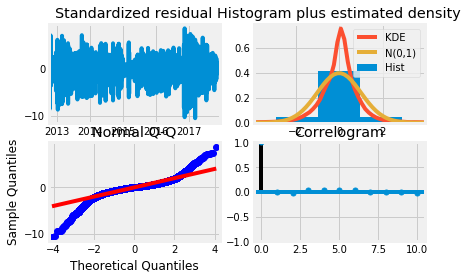

In [225]:
train_sample = pd.concat([humidity['Vancouver'].diff().iloc[1:],humidity['Montreal'].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

### State Space Models
1. SARIMA
2. Dynamic Linear Models(DLM)
3. Dynamic Factor Models(for multivariate)

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


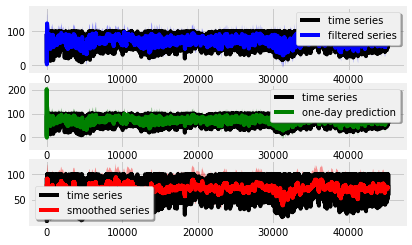

RMSE: 14.913628222025789


In [224]:
## Dynamic Linear Models

x= humidity['Montreal']
ts_DLM = dlm(x)
ts_DLM = ts_DLM + trend(degree=2, discount=0.99, name='trend1')
ts_DLM = ts_DLM + seasonality(period=2, discount=0.99, name='seasonality')
ts_DLM.fit()
ts_DLM.plot()
rmse=np.sqrt(ts_DLM.getMSE())
print('RMSE:', rmse)

## Resources:

1. http://archive.ics.uci.edu/ml/index.php

2. https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

3. https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook#4.-Modelling-using-statstools



### More on state space models and simulation in the next tutorial